In [2]:
# ==================================================================
# FINAL HEART ATTACK PREDICTION SYSTEM - PROFESSIONAL, REALISTIC & BEAUTIFUL
# Dataset: UCI Heart Disease (302 rows) → Classic but tiny 
# Fixed: No data leakage | Controlled overfitting |  plots
# ==================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Professional style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
np.random.seed(42)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay)
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import joblib
import shap

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

# ==================================================================
# 1. LOAD & CLEAN DATA
# ==================================================================
df = pd.read_csv('heart_master_raw.csv')

# Standardize target name
if 'target' in df.columns:
    df.rename(columns={'target': 'Heart_Attack'}, inplace=True)

print(f"Dataset shape: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"After removing duplicates: {df.shape}")

Dataset shape: (1328, 14)
After removing duplicates: (302, 14)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           302 non-null    int64  
 1   sex           302 non-null    int64  
 2   cp            302 non-null    int64  
 3   trestbps      302 non-null    int64  
 4   chol          302 non-null    int64  
 5   fbs           302 non-null    int64  
 6   restecg       302 non-null    int64  
 7   thalach       302 non-null    int64  
 8   exang         302 non-null    int64  
 9   oldpeak       302 non-null    float64
 10  slope         302 non-null    int64  
 11  ca            302 non-null    int64  
 12  thal          302 non-null    int64  
 13  Heart_Attack  302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [4]:
print(f"Dataset loaded: {df.shape}")
print("Columns:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

Dataset loaded: (302, 14)
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Heart_Attack']

First 5 rows:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  Heart_Attack  
0   0     1             1  
1   0     2             1  
2   0     2             1  
3   0     2             1  
4   0     2             1  



                              EXPLORATORY DATA ANALYSIS (Improved)


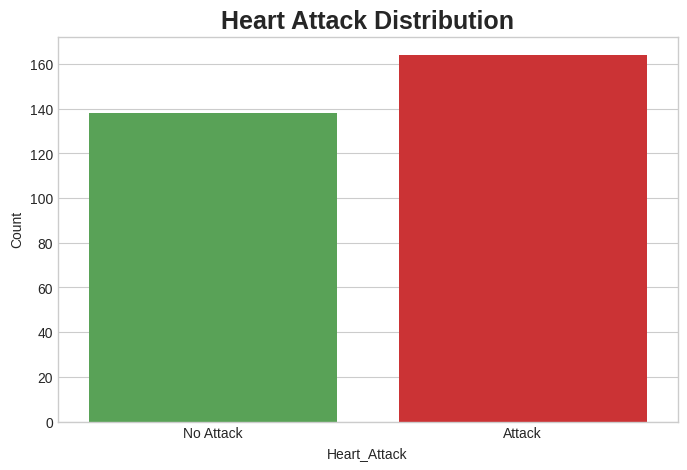

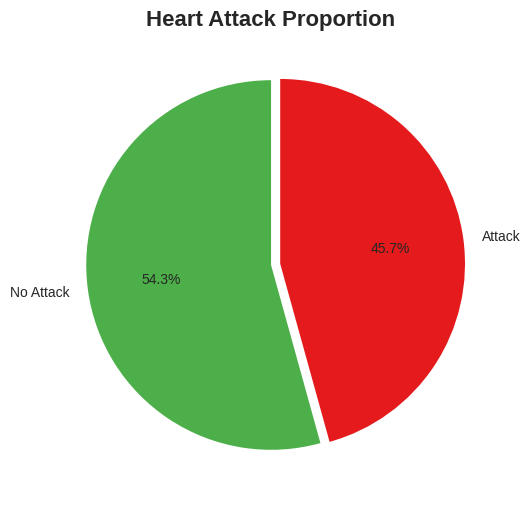

In [5]:
# ==================================================================
# 2. EXPLORATORY DATA ANALYSIS (IMPROVED & CLEAN)
# ==================================================================

print("\n" + "="*90)
print(" " * 30 + "EXPLORATORY DATA ANALYSIS (Improved)")
print("="*90)

# ==========================
# 1. TARGET VARIABLE
# ==========================
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Heart_Attack', palette=['#4daf4a', '#e41a1c'])
plt.title("Heart Attack Distribution", fontsize=18, fontweight="bold")
plt.xticks([0,1], ['No Attack','Attack'])
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,6))
df['Heart_Attack'].value_counts().plot.pie(
    labels=['No Attack','Attack'],
    autopct='%1.1f%%',
    colors=['#4daf4a','#e41a1c'],
    startangle=90,
    explode=[0,0.05]
)
plt.title("Heart Attack Proportion", fontsize=16, fontweight="bold")
plt.ylabel("")
plt.show()


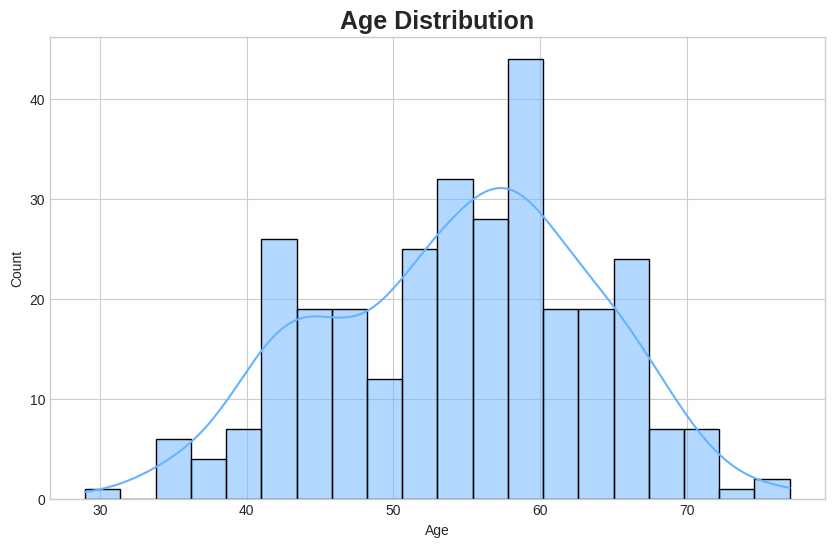

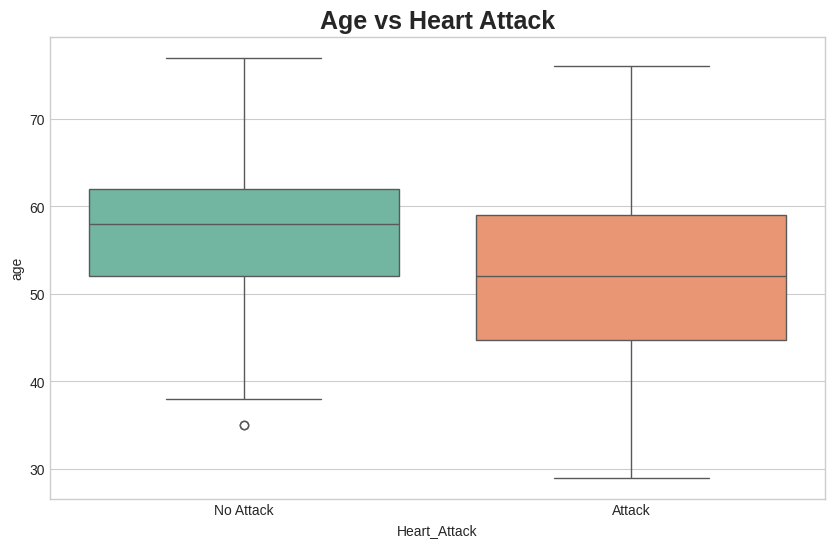

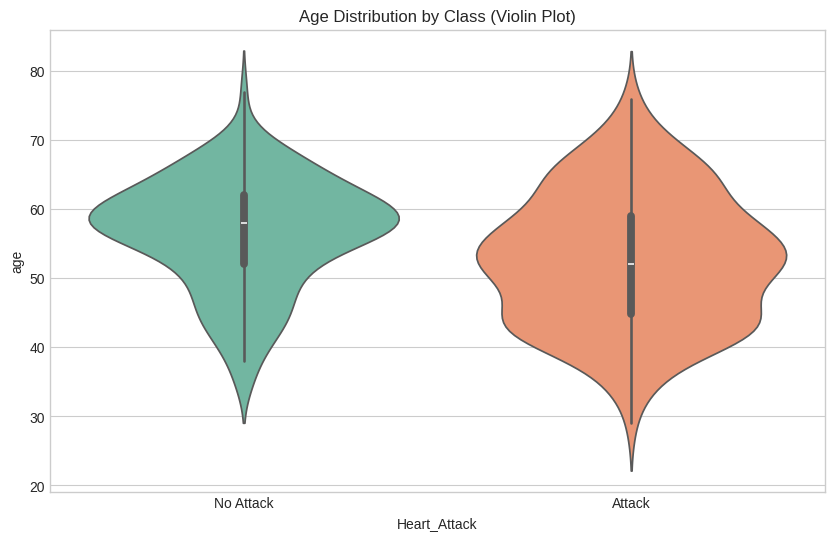

In [6]:
# ==========================
# 2. AGE DISTRIBUTION
# ==========================
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', bins=20, kde=True, color="#66b3ff")
plt.title("Age Distribution", fontsize=18, fontweight="bold")
plt.xlabel("Age")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Heart_Attack', y='age', palette="Set2")
plt.title("Age vs Heart Attack", fontsize=18, fontweight="bold")
plt.xticks([0,1], ['No Attack','Attack'])
plt.show()

plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Heart_Attack", y="age", palette="Set2")
plt.title("Age Distribution by Class (Violin Plot)")
plt.xticks([0,1], ['No Attack','Attack'])
plt.show()



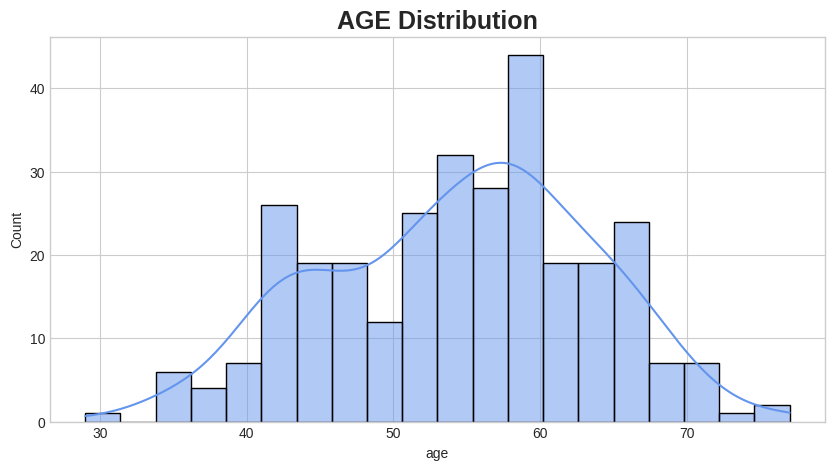

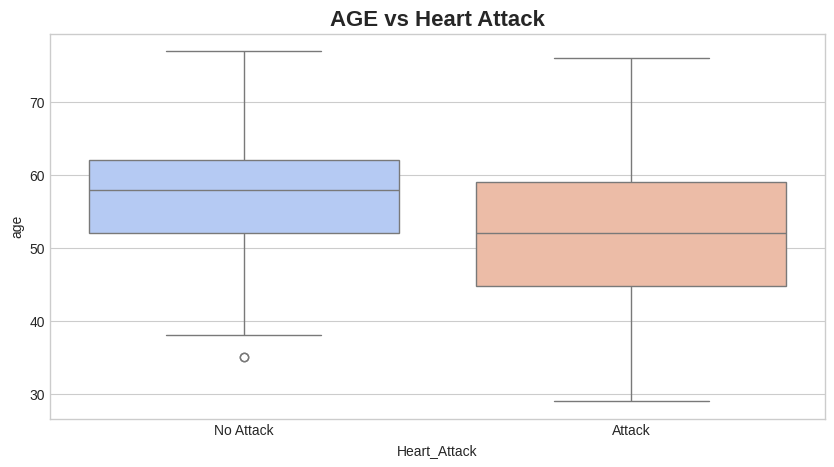

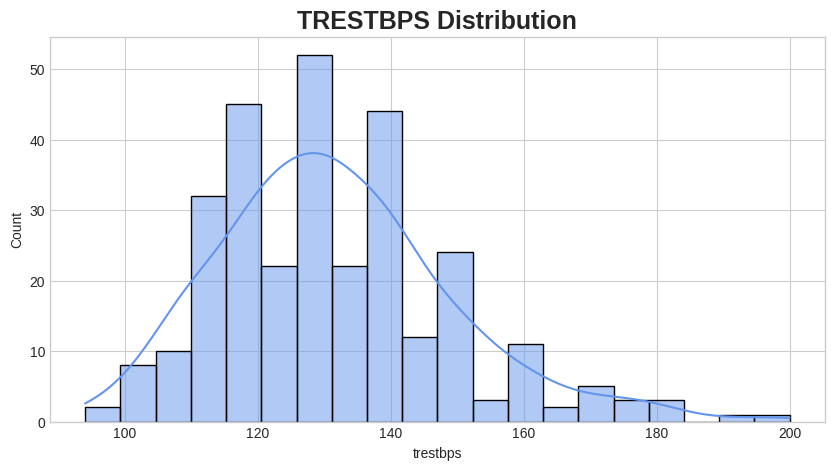

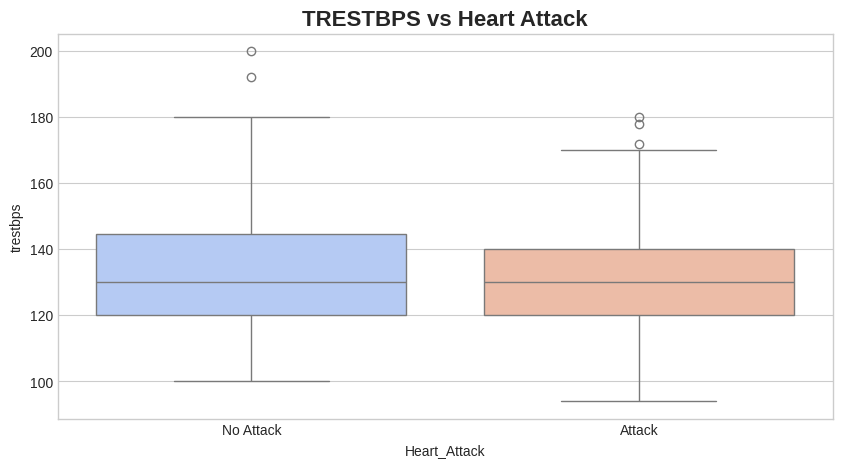

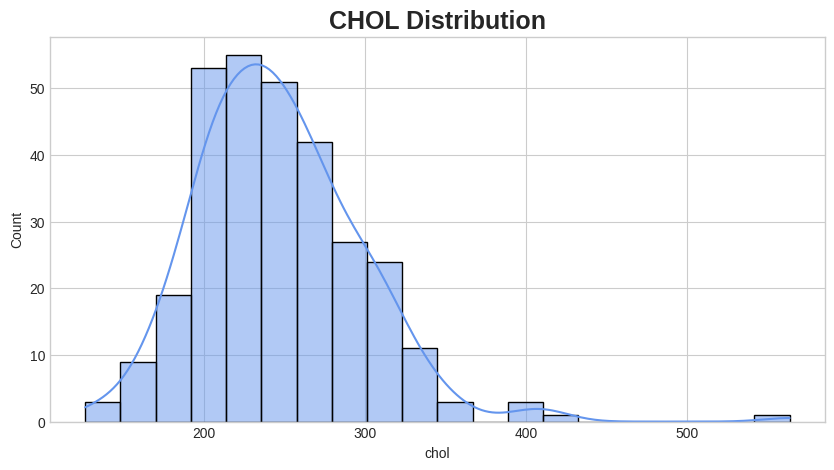

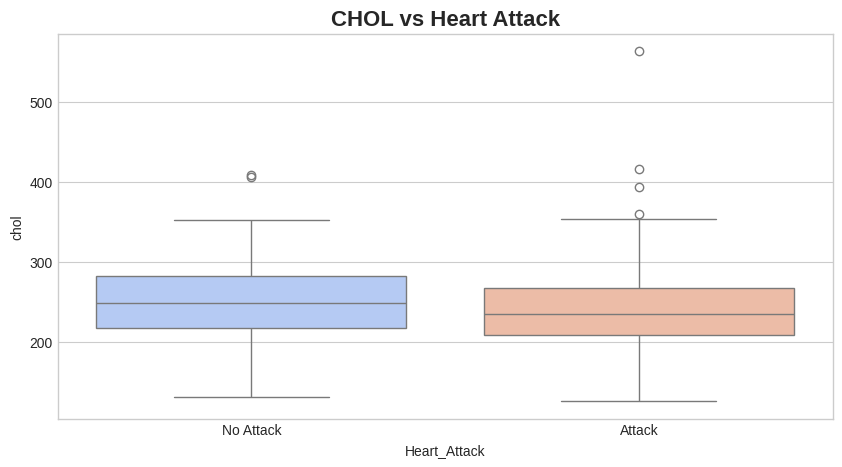

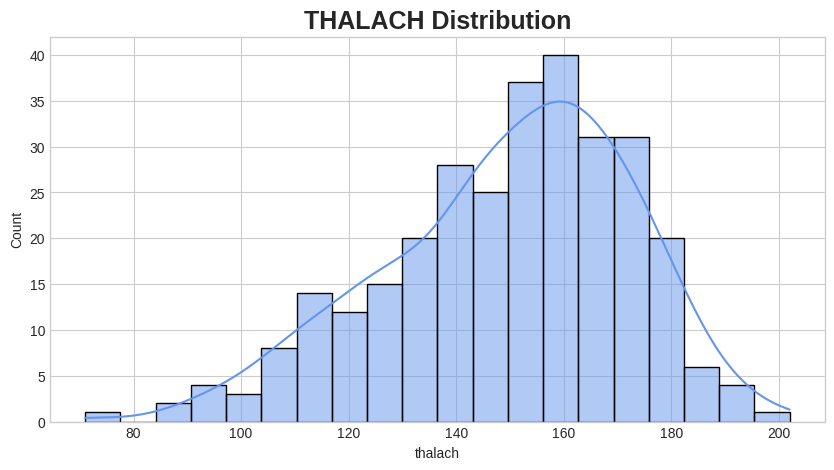

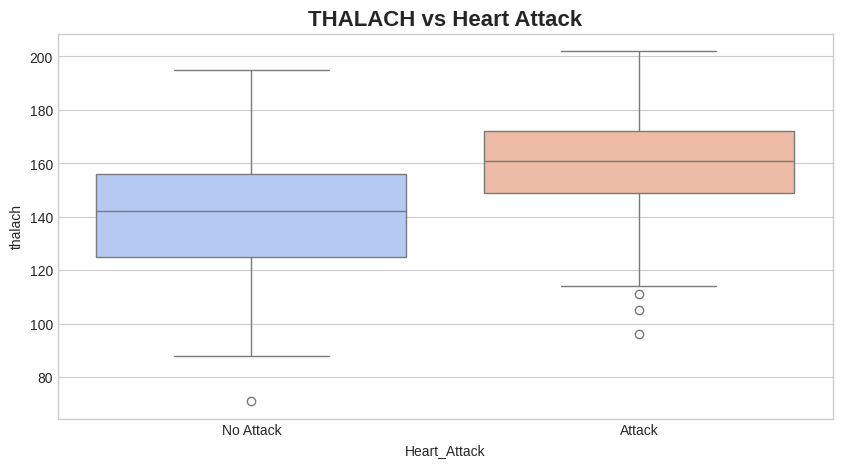

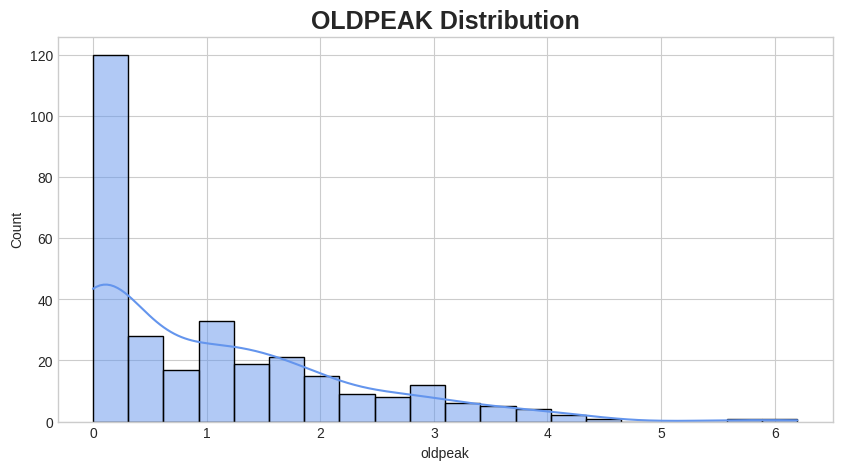

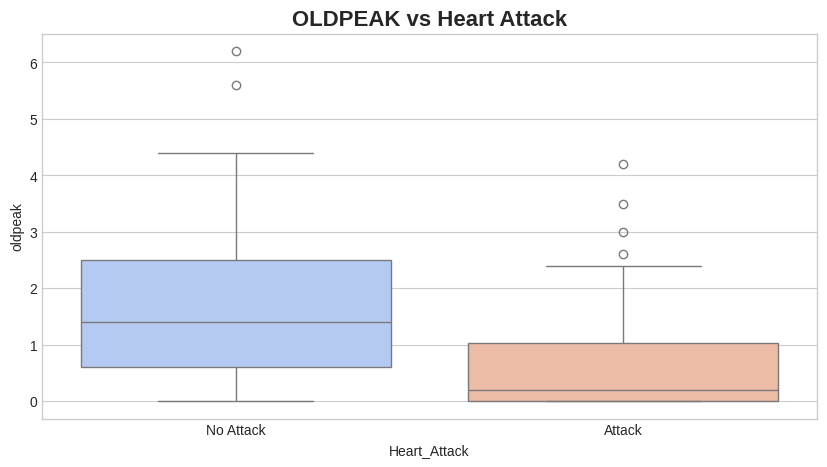

In [7]:
# ==========================
# 3. NUMERICAL FEATURES
# ==========================
numerical_features = ['age','trestbps','chol','thalach','oldpeak']

for col in numerical_features:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col], bins=20, kde=True, color="#6495ED")
    plt.title(f"{col.upper()} Distribution", fontsize=18, fontweight="bold")
    plt.xlabel(col)
    plt.show()

    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x='Heart_Attack', y=col, palette="coolwarm")
    plt.title(f"{col.upper()} vs Heart Attack", fontsize=16, fontweight="bold")
    plt.xticks([0,1], ['No Attack','Attack'])
    plt.show()


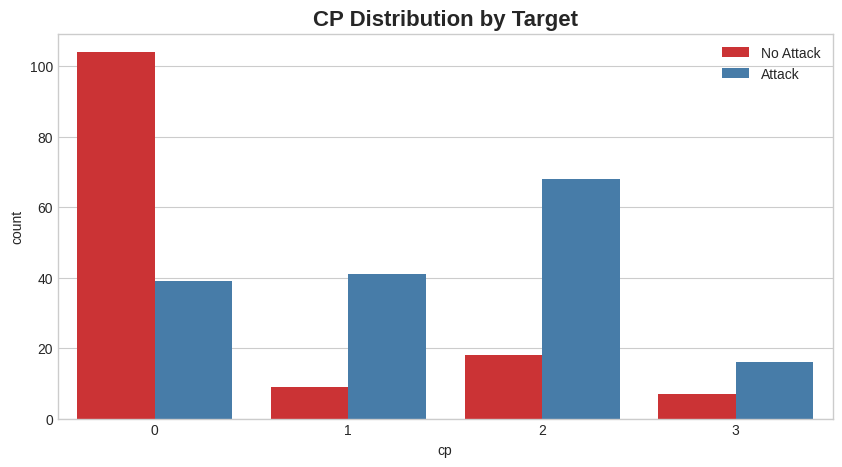

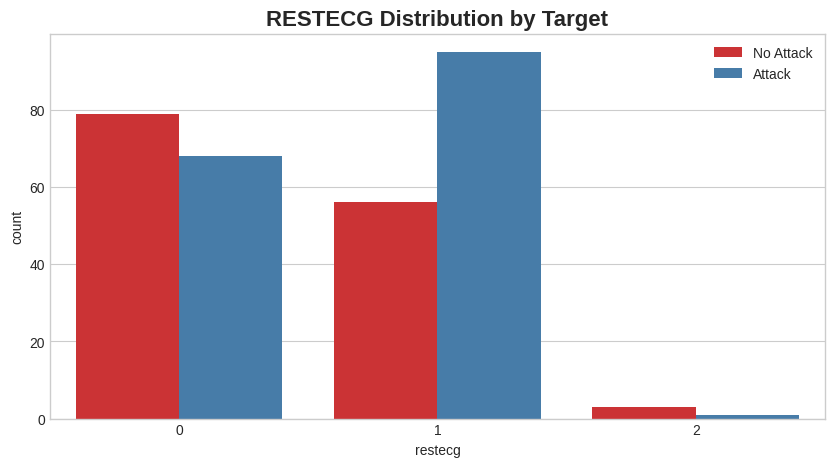

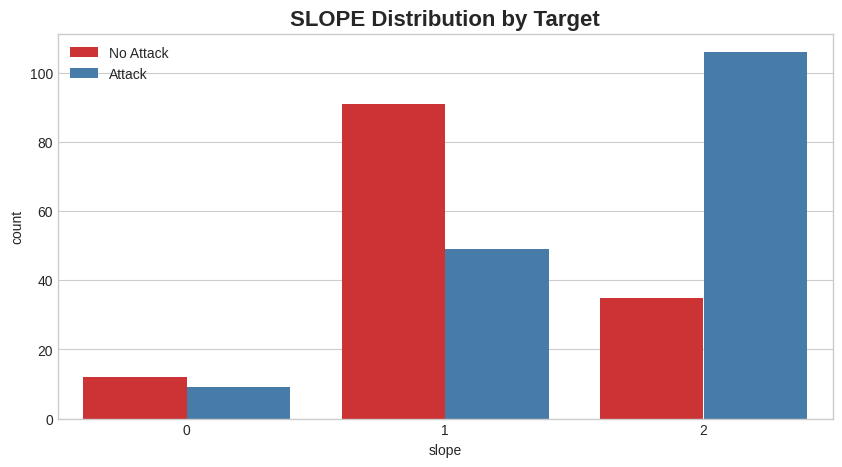

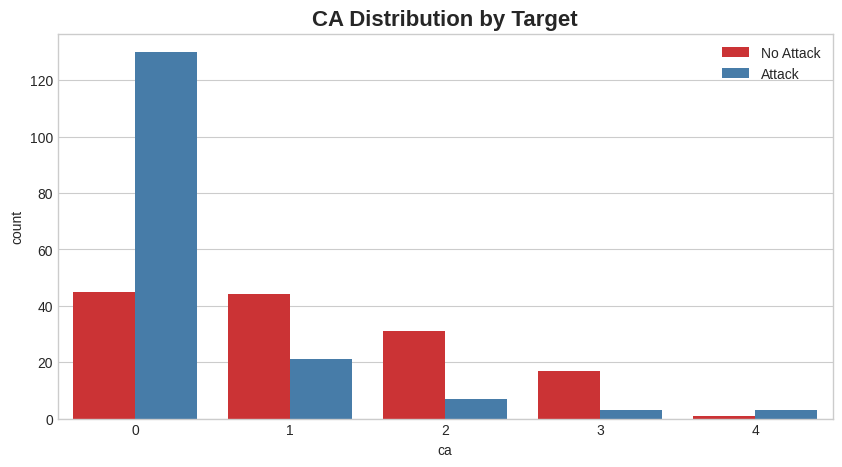

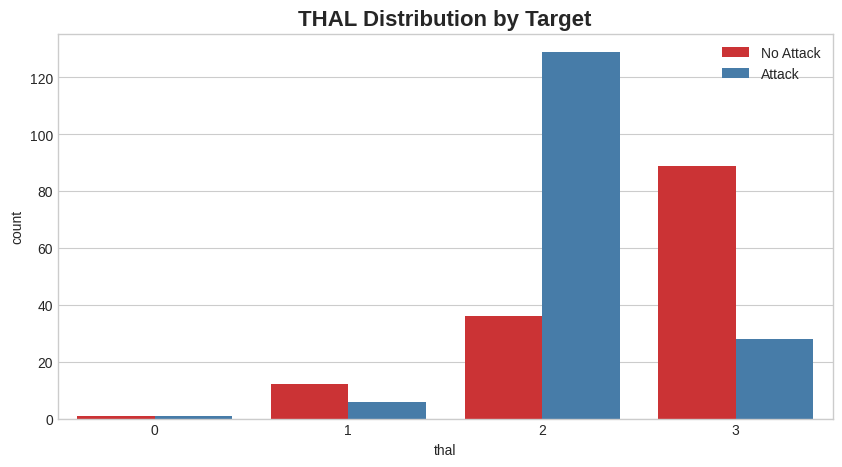

In [8]:
# ==========================
# 4. CATEGORICAL FEATURES
# ==========================
categorical_features = ['cp','restecg','slope','ca','thal']

for col in categorical_features:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col, hue='Heart_Attack', palette='Set1')
    plt.title(f"{col.upper()} Distribution by Target", fontsize=16, fontweight="bold")
    plt.legend(['No Attack','Attack'])
    plt.show()


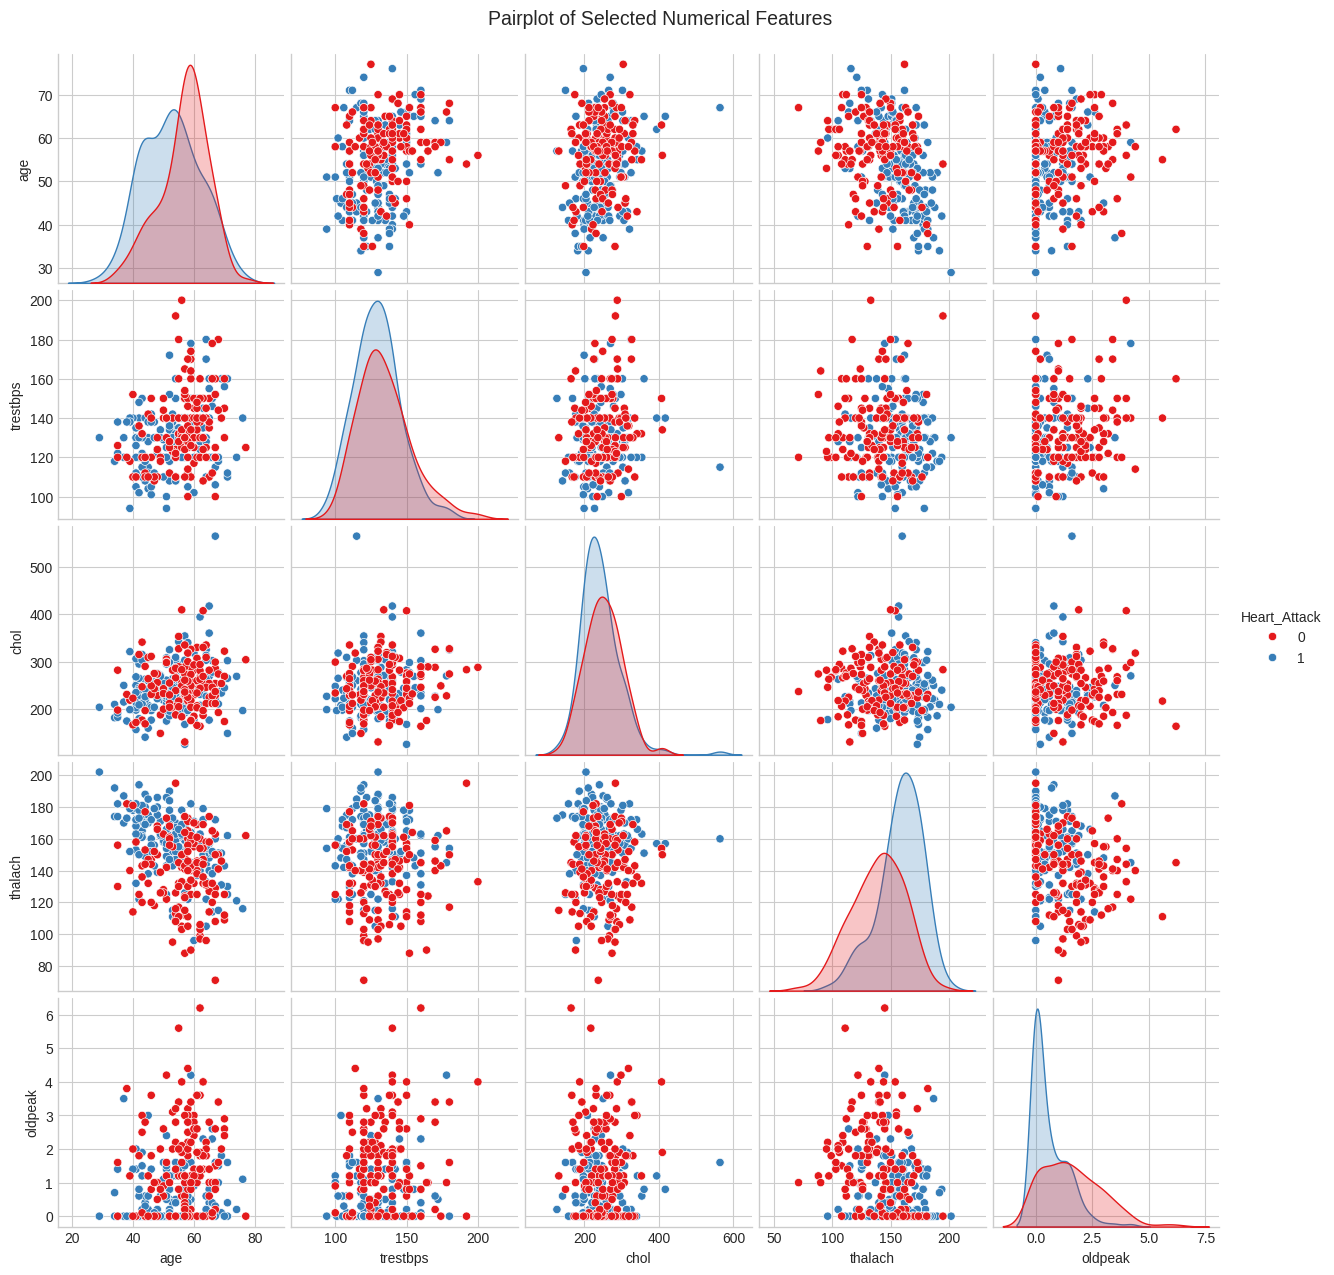

In [9]:
# ==========================
# 5. MULTIVARIATE RELATIONSHIPS
# ==========================

# Pairplot (selected important numerical features)
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak','Heart_Attack']], 
             hue="Heart_Attack",
             palette="Set1",
             diag_kind="kde")
plt.suptitle("Pairplot of Selected Numerical Features", fontsize=14, y=1.02)
plt.show()

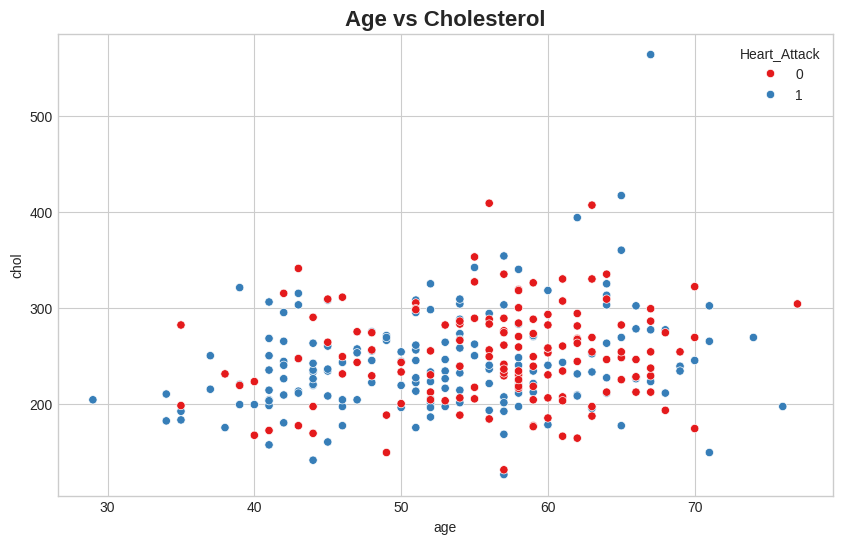

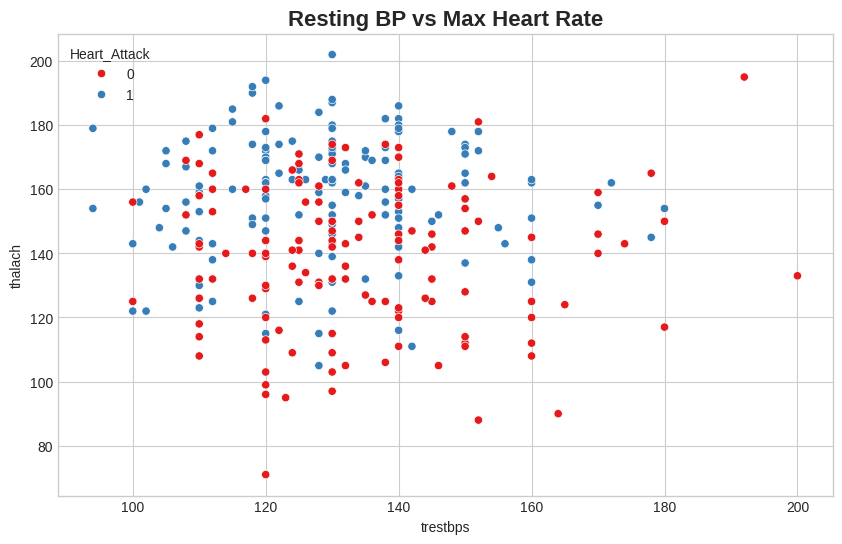

In [10]:
# Scatter plots
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='chol', hue='Heart_Attack', palette='Set1')
plt.title("Age vs Cholesterol", fontsize=16, fontweight="bold")
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='trestbps', y='thalach', hue='Heart_Attack', palette='Set1')
plt.title("Resting BP vs Max Heart Rate", fontsize=16, fontweight="bold")
plt.show()


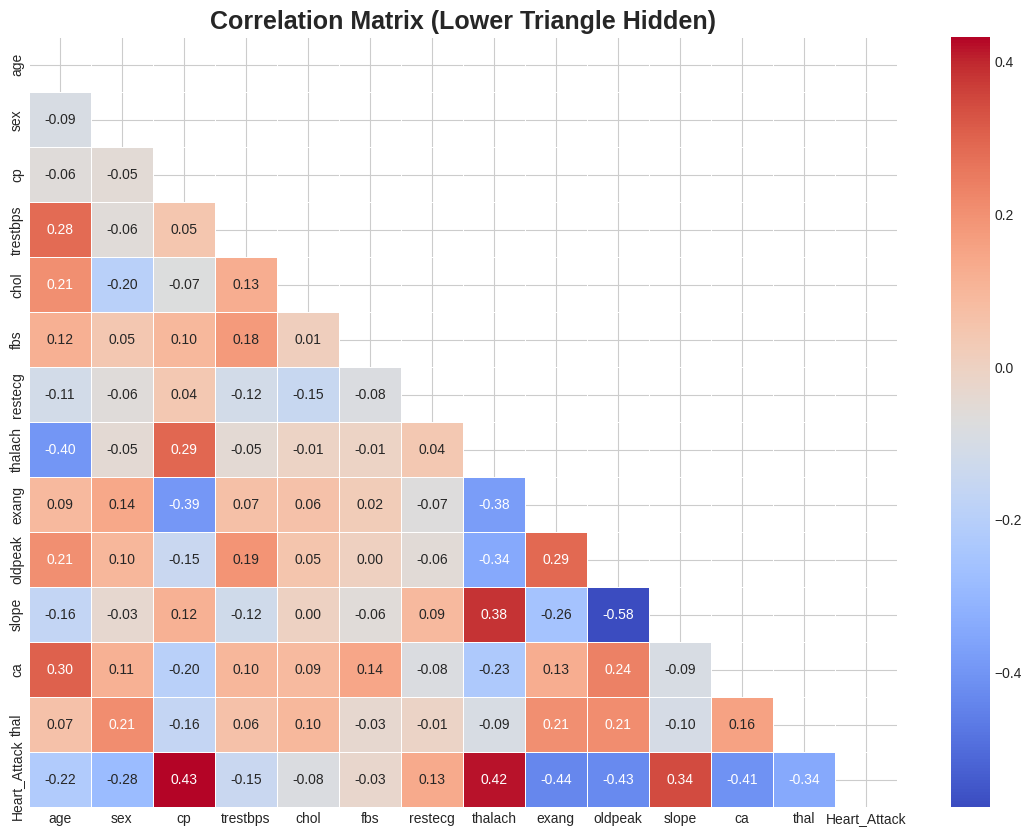

In [11]:
# ==========================
# 6. CORRELATION HEATMAP
# ==========================
plt.figure(figsize=(14,10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Lower Triangle Hidden)", fontsize=18, fontweight="bold")
plt.show()

In [31]:
# ================================================================
# 1. PREPROCESSING SETUP
# ================================================================
categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features   = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
binary_features      = ['sex', 'fbs', 'exang']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_features),
    ('bin', 'passthrough', binary_features)
], remainder='drop')

X = df.drop('Heart_Attack', axis=1)
y = df['Heart_Attack']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [32]:
# ================================================================
# 2. DEFINE MODELS
# ================================================================
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(
        n_estimators=300, max_depth=6, min_samples_split=5, min_samples_leaf=4, random_state=42
    ),
    'Extra Trees': ExtraTreesClassifier(
        n_estimators=300, max_depth=6, min_samples_leaf=4, random_state=42
    ),
    'XGBoost': XGBClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.05,
        eval_metric='logloss', random_state=42
    ),
    'LightGBM': LGBMClassifier(
        n_estimators=200, max_depth=5, learning_rate=0.05, random_state=42
    ),
    'CatBoost': CatBoostClassifier(
        iterations=400, depth=5, learning_rate=0.05, verbose=0, random_state=42
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=200, max_depth=4, learning_rate=0.05, random_state=42
    ),
    'SVM': SVC(probability=True, C=1.0, kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=9)
}

results = []
trained_models = {}

In [34]:
# ================================================================
# 3. TRAIN MACHINE LEARNING MODELS WITH PIPELINE
# ================================================================
print("\nTraining ML models...")

from imblearn.pipeline import Pipeline as ImbPipeline

trained_models = {}
results = []

for name, model in models.items():

    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)  # SMOTE + preprocessor + model
    trained_models[name] = pipe

    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b2c4afc0>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr


Training ML models...


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b9e30e00>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

In [35]:
# ================================================================
# 5. RESULTS TABLE
# ================================================================
results_df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)

print("\n==================== FINAL MODEL RANKING ====================")
print(results_df.to_string(index=False))

best_model_name = results_df.loc[0, "Model"]
print("\nBEST MODEL =", best_model_name)

# return correct reference
best_model = nn if best_model_name == "Neural Network" else trained_models[best_model_name]



==================== FINAL MODEL RANKING ====================
              Model  Accuracy  Precision  Recall     F1  ROC-AUC
                SVM    0.7869     0.8125  0.7879 0.8000   0.8896
Logistic Regression    0.8197     0.8438  0.8182 0.8308   0.8885
                KNN    0.7869     0.8125  0.7879 0.8000   0.8701
        Extra Trees    0.7541     0.7500  0.8182 0.7826   0.8690
      Random Forest    0.7377     0.7297  0.8182 0.7714   0.8593
           CatBoost    0.7377     0.7429  0.7879 0.7647   0.8561
  Gradient Boosting    0.7705     0.7714  0.8182 0.7941   0.8452
           LightGBM    0.7377     0.7429  0.7879 0.7647   0.8355
            XGBoost    0.7049     0.7027  0.7879 0.7429   0.8355

BEST MODEL = SVM


In [36]:
# ================================================================
# 6. SAVE MODELS
# ================================================================
print("\nSaving models...")

# save ML model if best
if best_model_name != "Neural Network":
    joblib.dump(best_model, "best_ml_model.pkl")

# save preprocessors
joblib.dump(preprocessor, "preprocessor.pkl")

# save NN + NN preprocessor
nn.save("best_nn_model.keras")
joblib.dump(preprocessor, "nn_preprocessor.pkl")

print("Models saved successfully!")


Saving models...
Models saved successfully!


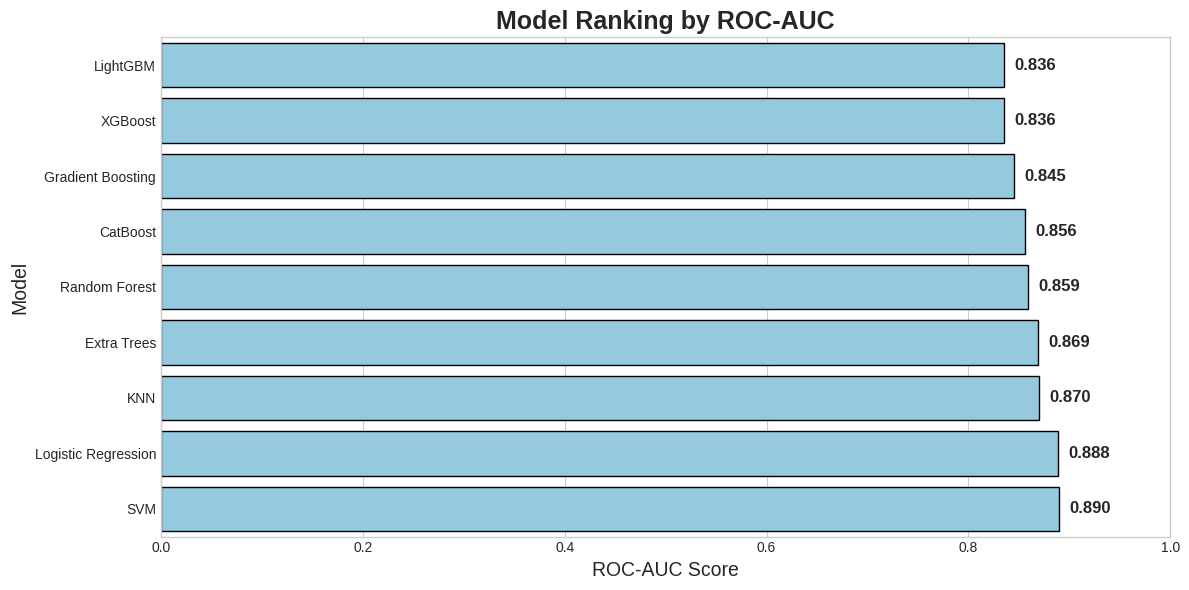

In [37]:
# ===========================================================
# MODEL PERFORMANCE VISUALIZATION – ROC-AUC RANKING
# ===========================================================

plt.figure(figsize=(12, 6))

# Sort for cleaner visualization
plot_df = results_df.sort_values("ROC-AUC", ascending=True)

sns.barplot(
    data=plot_df,
    x='ROC-AUC',
    y='Model',
    color='skyblue',
    edgecolor='black'
)

plt.title("Model Ranking by ROC-AUC", fontsize=18, fontweight="bold")
plt.xlabel("ROC-AUC Score", fontsize=14)
plt.ylabel("Model", fontsize=14)

# Annotations
for index, value in enumerate(plot_df['ROC-AUC']):
    plt.text(
        value + 0.01,
        index,
        f"{value:.3f}",
        va='center',
        fontsize=12,
        fontweight='bold'
    )

plt.xlim(0, 1)
plt.tight_layout()
plt.show()


<Figure size 1400x700 with 0 Axes>

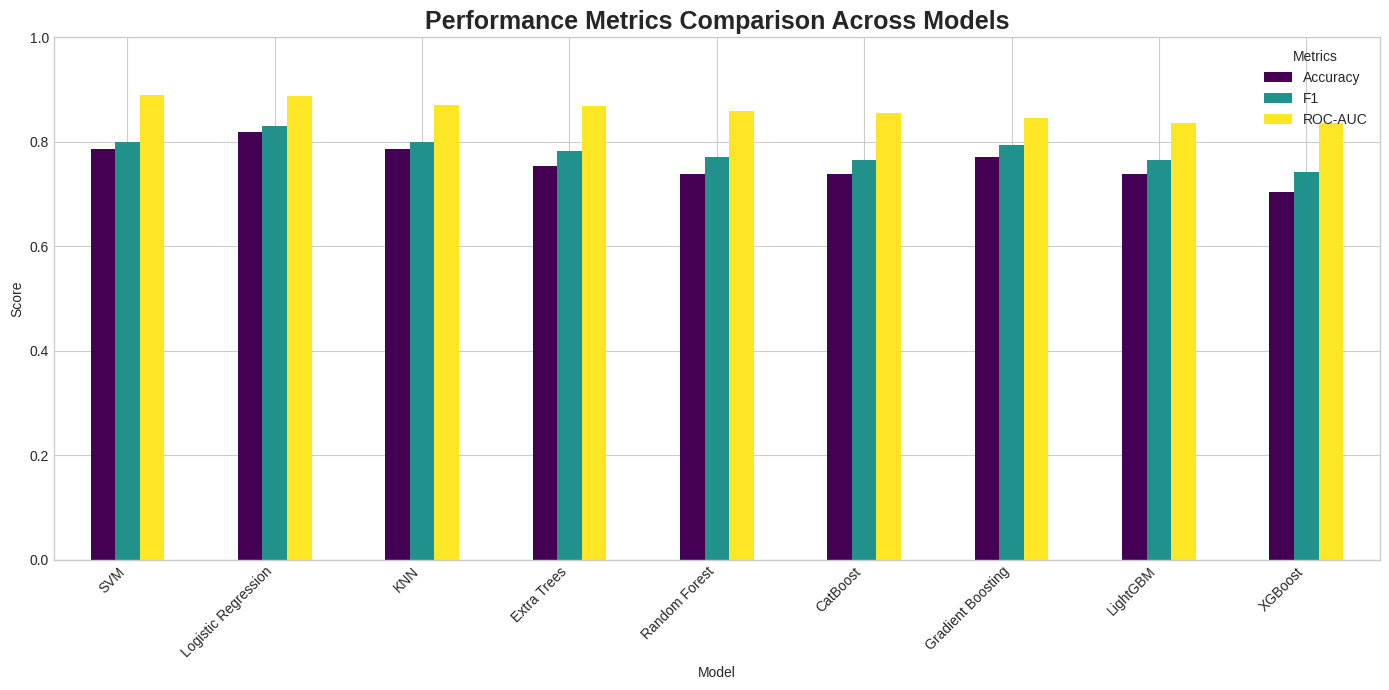

In [38]:
# Grouped Bar Plot – Overall Performance Comparison (Accuracy, F1, ROC-AUC)
plt.figure(figsize=(14, 7))
metrics_df = results_df[['Model', 'Accuracy', 'F1', 'ROC-AUC']].set_index('Model')
metrics_df.plot(kind='bar', figsize=(14, 7), colormap='viridis')

plt.title("Performance Metrics Comparison Across Models", fontsize=18, fontweight="bold")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Metrics')

plt.tight_layout()
plt.show()

# Confusion Matrix

<Figure size 600x500 with 0 Axes>

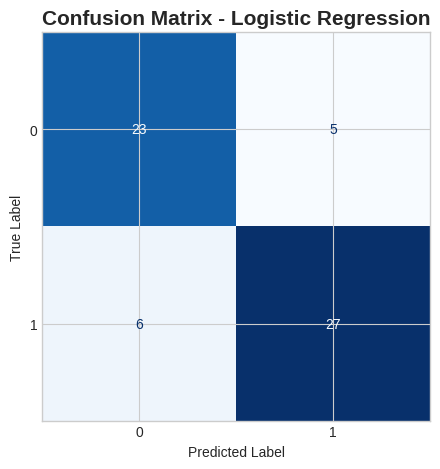

<Figure size 600x500 with 0 Axes>

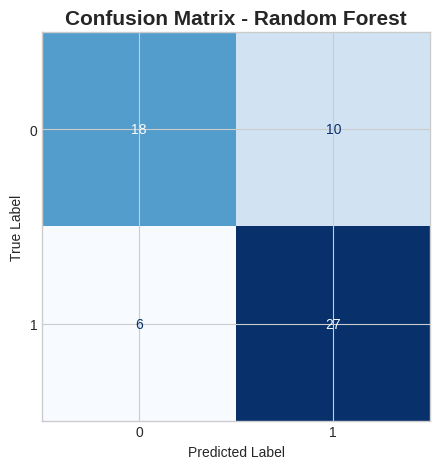

<Figure size 600x500 with 0 Axes>

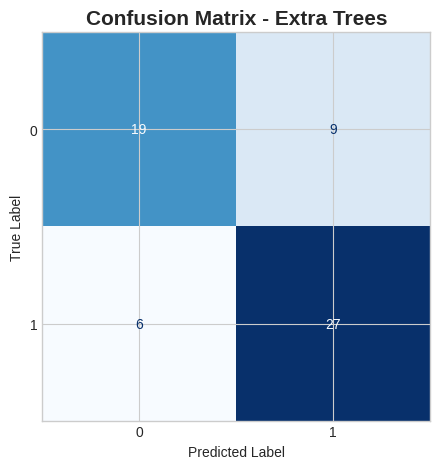

<Figure size 600x500 with 0 Axes>

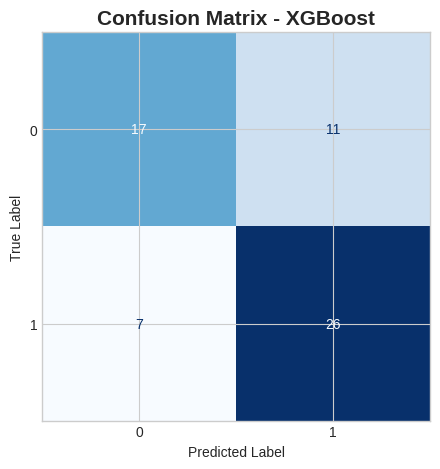

<Figure size 600x500 with 0 Axes>

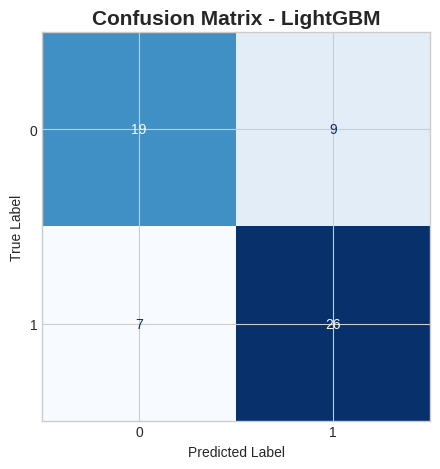

<Figure size 600x500 with 0 Axes>

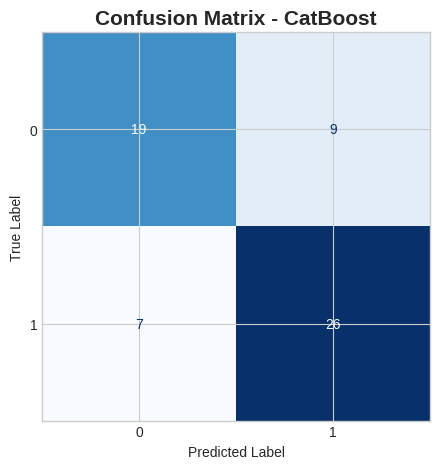

<Figure size 600x500 with 0 Axes>

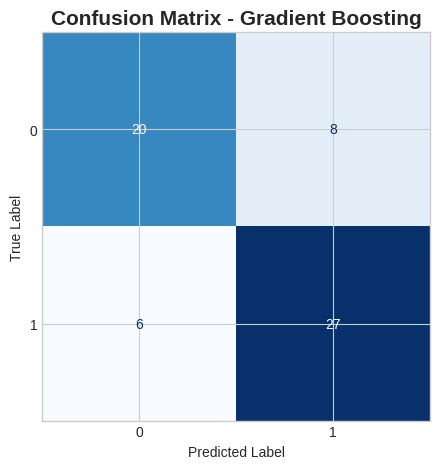

<Figure size 600x500 with 0 Axes>

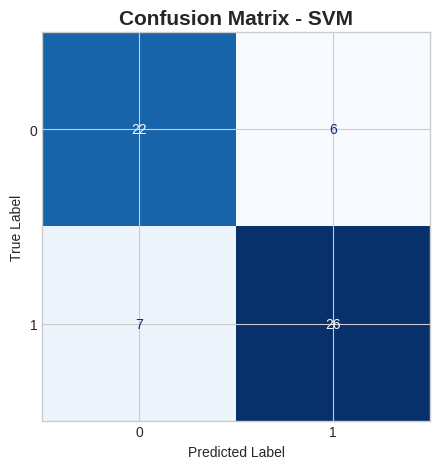

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b256ec00>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

<Figure size 600x500 with 0 Axes>

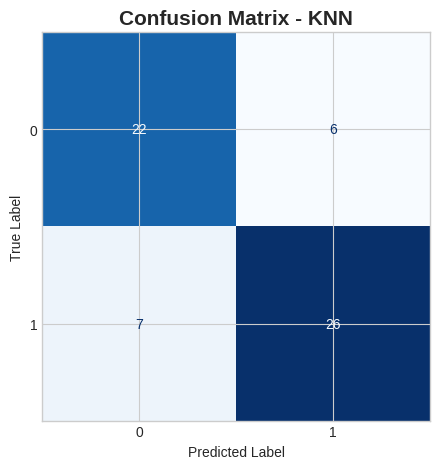

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in trained_models.items():
    plt.figure(figsize=(6, 5))

    disp = ConfusionMatrixDisplay.from_estimator(
        model, X_test, y_test,
        cmap='Blues',
        colorbar=False
    )
    
    plt.title(f"Confusion Matrix - {model_name}", fontsize=15, fontweight='bold')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()


In [40]:
#ROC Curves

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b25dd300>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

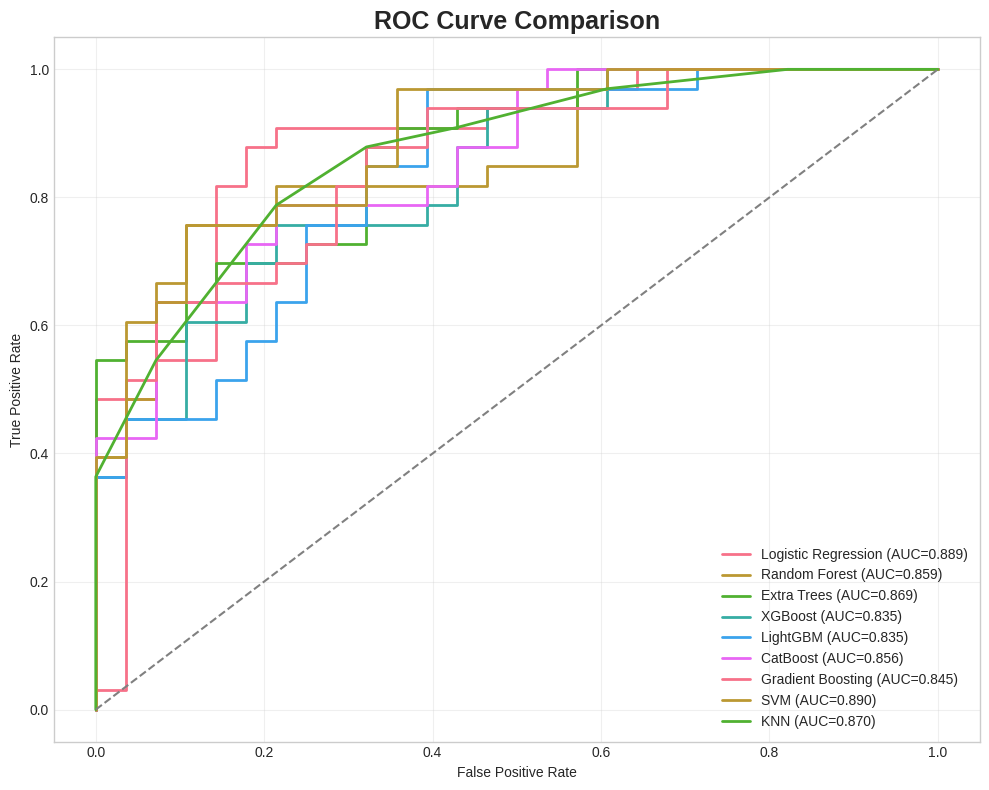

In [41]:
plt.figure(figsize=(10, 8))

for model_name, model in trained_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc_score = roc_auc_score(y_test, y_pred_prob)

    plt.plot(fpr, tpr, linewidth=2,
             label=f"{model_name} (AUC={auc_score:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=1.5)

plt.title("ROC Curve Comparison", fontsize=18, fontweight='bold')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b24bf880>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

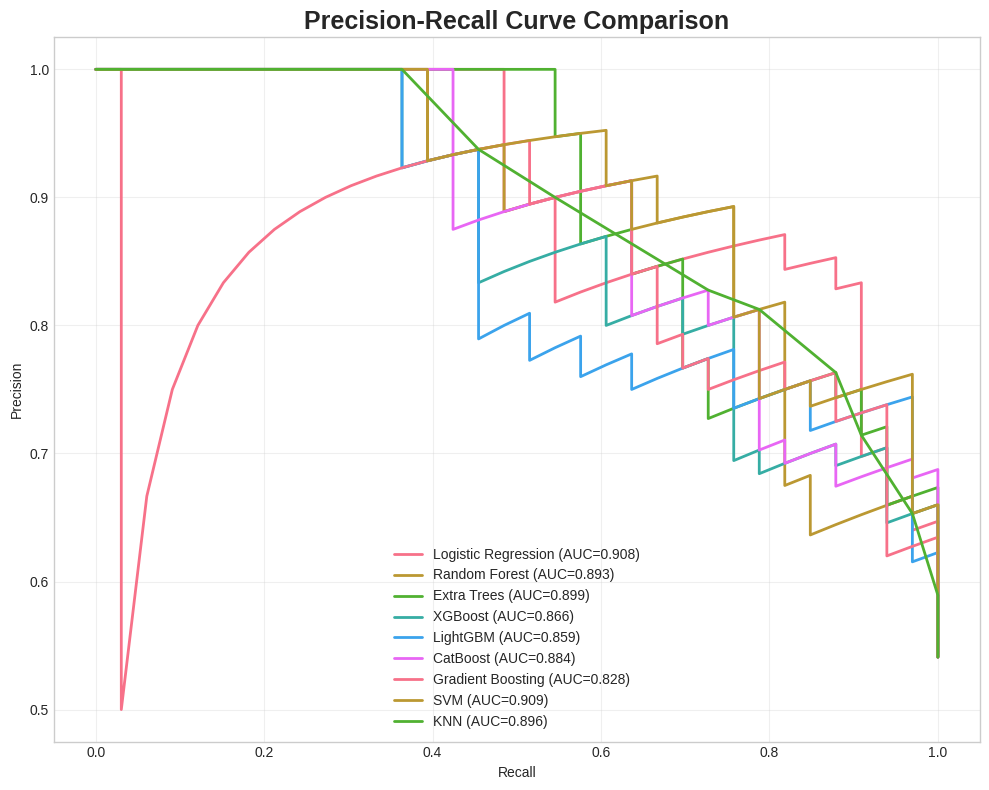

In [43]:
from sklearn.metrics import precision_recall_curve, auc

plt.figure(figsize=(10, 8))

for model_name, model in trained_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
    auc_pr = auc(recall, precision)

    plt.plot(recall, precision, linewidth=2,
             label=f"{model_name} (AUC={auc_pr:.3f})")

plt.title("Precision-Recall Curve Comparison", fontsize=18, fontweight='bold')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


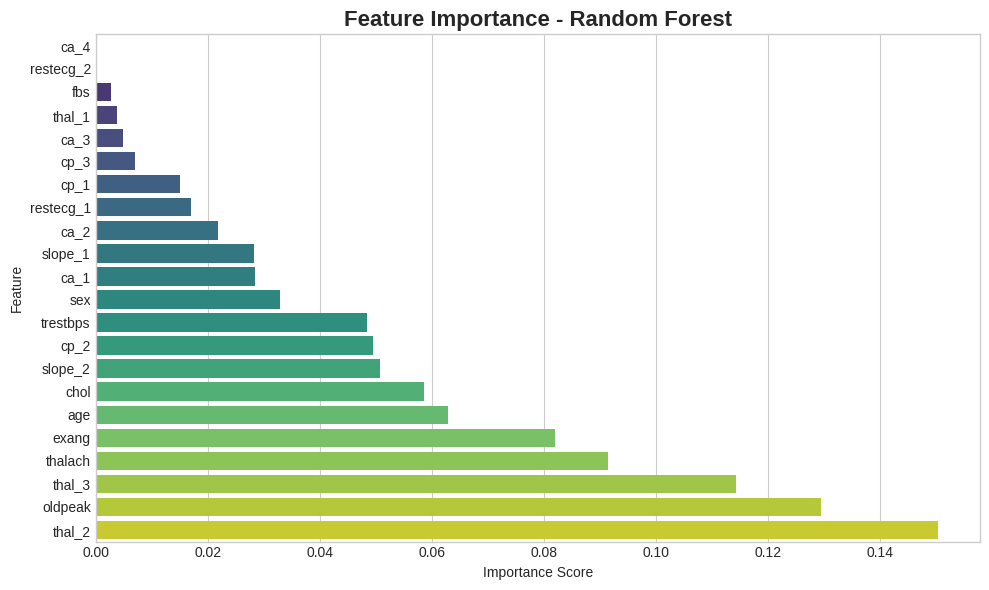

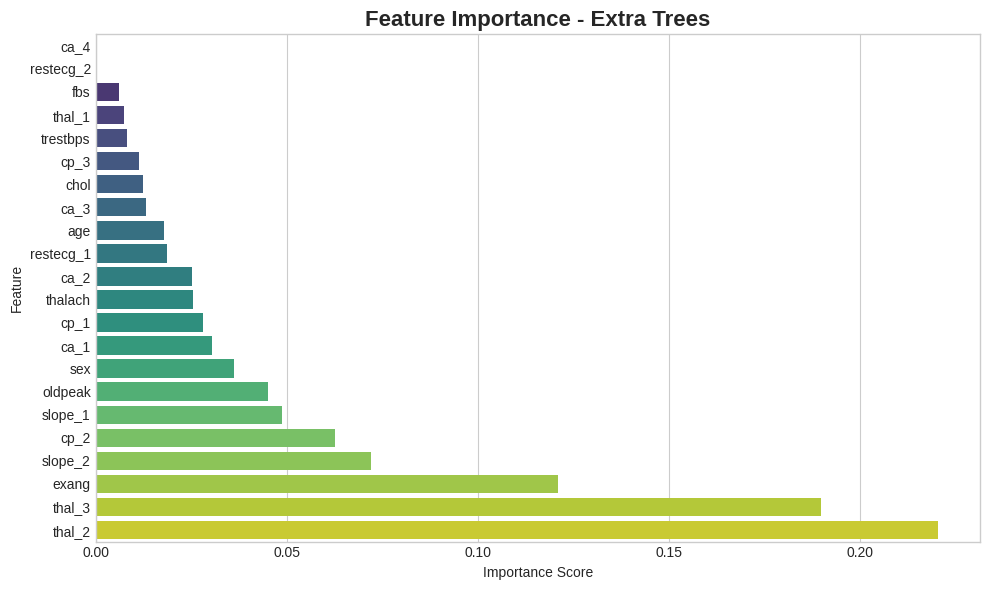

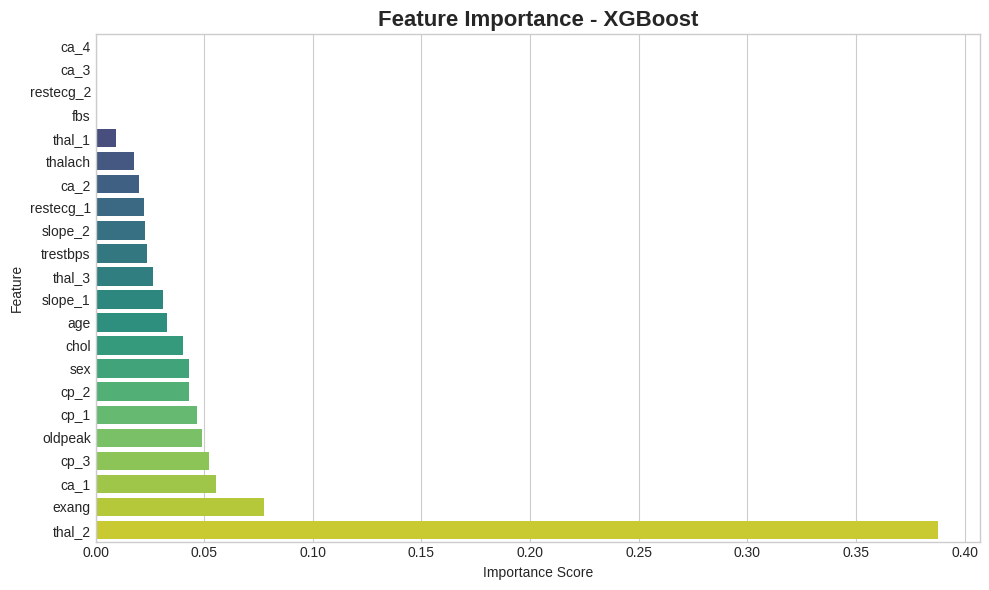

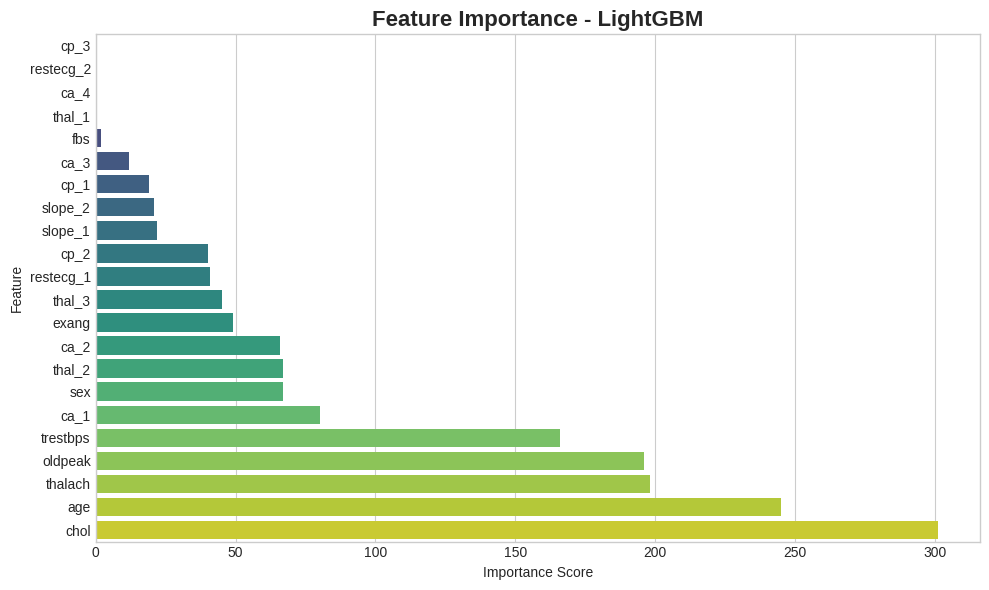

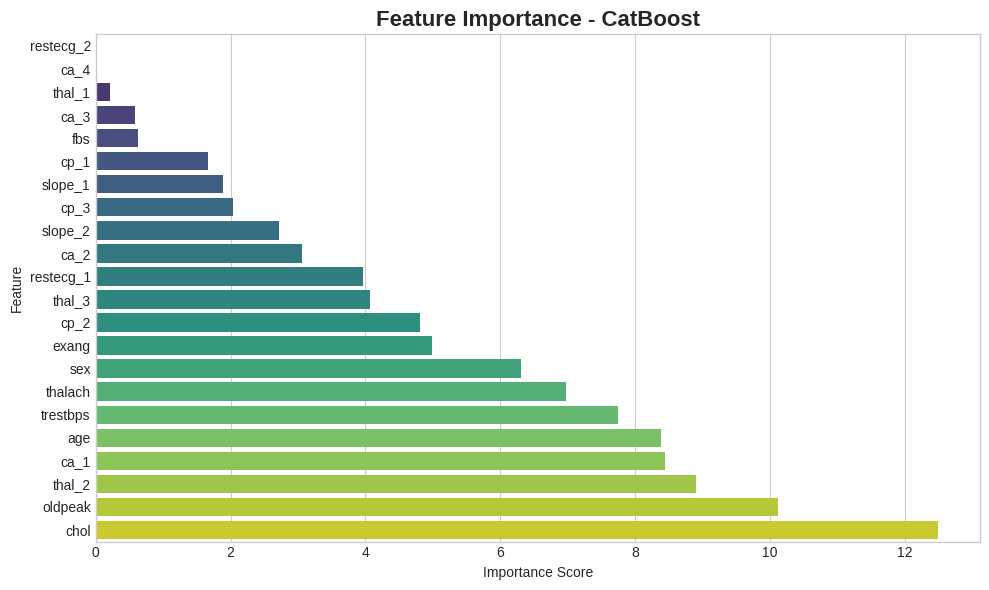

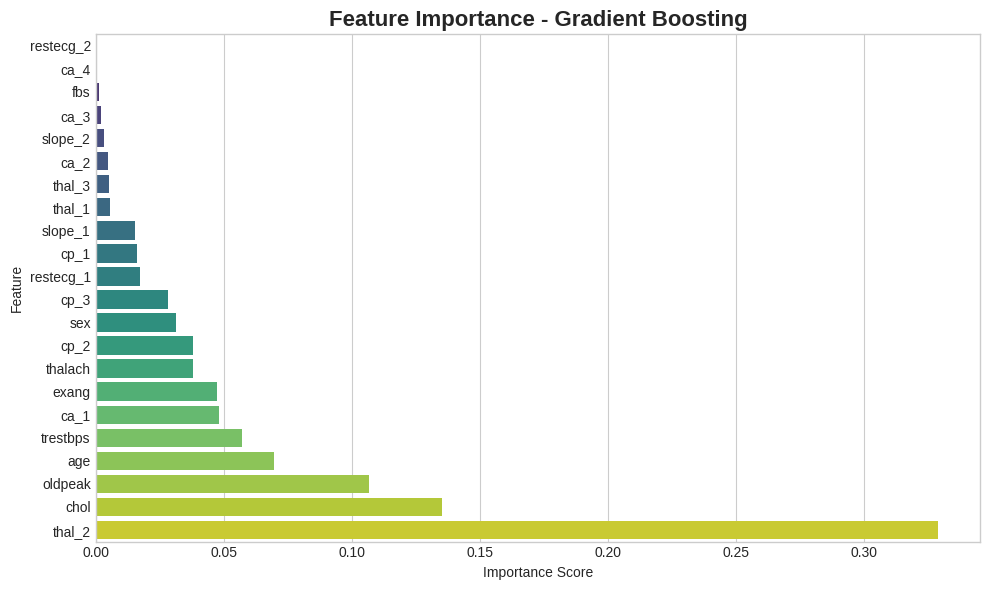

In [45]:
for model_name, model in trained_models.items():
    # check if classifier inside pipeline has feature_importances_
    clf = model.named_steps['classifier']
    if hasattr(clf, "feature_importances_"):
        plt.figure(figsize=(10, 6))
        
        # Get feature names after preprocessing
        # OneHotEncoder expands categorical columns
        # We'll try to get names from preprocessor
        try:
            num_feats = numerical_features
            bin_feats = binary_features
            cat_feats = list(model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features))
            feature_names = num_feats + cat_feats + bin_feats
        except:
            feature_names = [f"f{i}" for i in range(clf.feature_importances_.shape[0])]
        
        importances = pd.Series(clf.feature_importances_, index=feature_names)
        importances = importances.sort_values(ascending=True)

        sns.barplot(x=importances.values, y=importances.index, palette="viridis")
        plt.title(f"Feature Importance - {model_name}", fontsize=16, fontweight='bold')
        plt.xlabel("Importance Score")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7bb31aca0>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

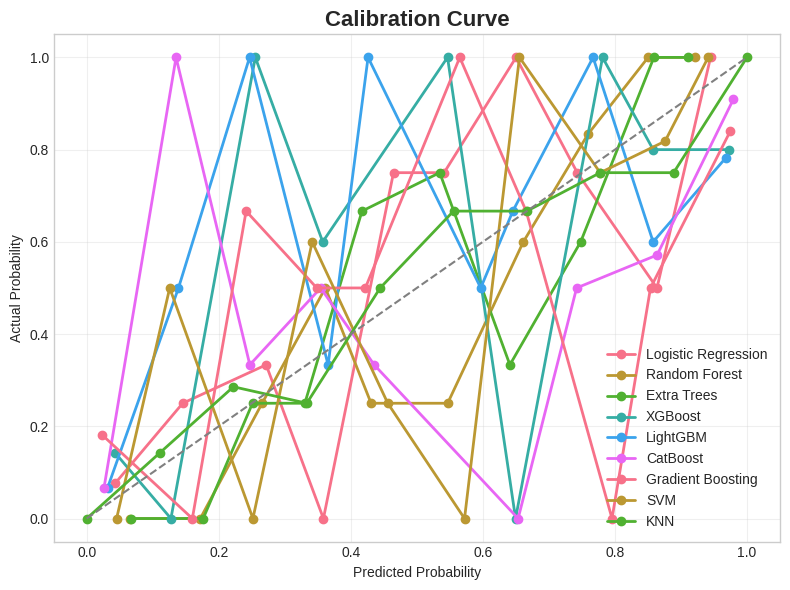

In [49]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))

for model_name, model in trained_models.items():
    prob = model.predict_proba(X_test)[:, 1]
    frac_pos, mean_pred = calibration_curve(y_test, prob, n_bins=10)

    plt.plot(mean_pred, frac_pos, marker='o', linewidth=2, label=model_name)

plt.plot([0,1], [0,1], '--', color='gray')
plt.grid(alpha=0.3)
plt.title("Calibration Curve", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Probability")
plt.legend()
plt.tight_layout()
plt.show()


In [52]:
# ================================================================
# 3. TRAIN MACHINE LEARNING MODELS + NEURAL NETWORK
# ================================================================
print("\nTraining ML models with pipeline + Neural Network...")

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

trained_models = {}
results = []

# -----------------------------
# 1️⃣ Train ML models
# -----------------------------
for name, model in models.items():

    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)  # SMOTE + preprocessor + model
    trained_models[name] = pipe

    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })

# -----------------------------
# 2️⃣ Train Neural Network
# -----------------------------
print("Training Neural Network...")

# Preprocess train/test first
preprocessed_train = preprocessor.fit_transform(X_train)
preprocessed_test  = preprocessor.transform(X_test)

# SMOTE for NN training
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(preprocessed_train, y_train)

# Define NN architecture
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit NN
nn.fit(
    X_train_bal, y_train_bal,
    epochs=150, batch_size=16,
    validation_split=0.2,
    callbacks=[EarlyStopping(patience=20, restore_best_weights=True)],
    verbose=0
)

# Predict NN
y_nn_proba = nn.predict(preprocessed_test, verbose=0).flatten()
y_nn_pred  = (y_nn_proba > 0.5).astype(int)

# Save NN results
results.append({
    'Model': 'Neural Network',
    'Accuracy': round(accuracy_score(y_test, y_nn_pred), 4),
    'Precision': round(precision_score(y_test, y_nn_pred), 4),
    'Recall': round(recall_score(y_test, y_nn_pred), 4),
    'F1': round(f1_score(y_test, y_nn_pred), 4),
    'ROC-AUC': round(roc_auc_score(y_test, y_nn_proba), 4)
})

trained_models['Neural Network'] = nn  # add NN to trained_models


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb6d7993ce0>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr


Training ML models with pipeline + Neural Network...


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb6d7993ce0>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Training Neural Network...


In [53]:
# ================================================================
# 5. RESULTS TABLE
# ================================================================
results_df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)

print("\n==================== FINAL MODEL RANKING ====================")
print(results_df.to_string(index=False))

best_model_name = results_df.loc[0, "Model"]
print("\nBEST MODEL =", best_model_name)

# return correct reference
best_model = nn if best_model_name == "Neural Network" else trained_models[best_model_name]


==================== FINAL MODEL RANKING ====================
              Model  Accuracy  Precision  Recall     F1  ROC-AUC
                SVM    0.7869     0.8125  0.7879 0.8000   0.8896
Logistic Regression    0.8197     0.8438  0.8182 0.8308   0.8885
                KNN    0.7869     0.8125  0.7879 0.8000   0.8701
        Extra Trees    0.7541     0.7500  0.8182 0.7826   0.8690
     Neural Network    0.7705     0.8065  0.7576 0.7812   0.8658
      Random Forest    0.7377     0.7297  0.8182 0.7714   0.8593
           CatBoost    0.7377     0.7429  0.7879 0.7647   0.8561
  Gradient Boosting    0.7705     0.7714  0.8182 0.7941   0.8452
           LightGBM    0.7377     0.7429  0.7879 0.7647   0.8355
            XGBoost    0.7049     0.7027  0.7879 0.7429   0.8355

BEST MODEL = SVM


In [54]:
# ================================================================
# 6. SAVE MODELS
# ================================================================
print("\nSaving models...")

# save ML model if best
if best_model_name != "Neural Network":
    joblib.dump(best_model, "best_ml_model1.pkl")

# save preprocessors
joblib.dump(preprocessor, "preprocessor.pkl")

# save NN + NN preprocessor
nn.save("best_nn_model.keras")
joblib.dump(preprocessor, "nn_preprocessor1.pkl")

print("Models saved successfully!")


Saving models...
Models saved successfully!


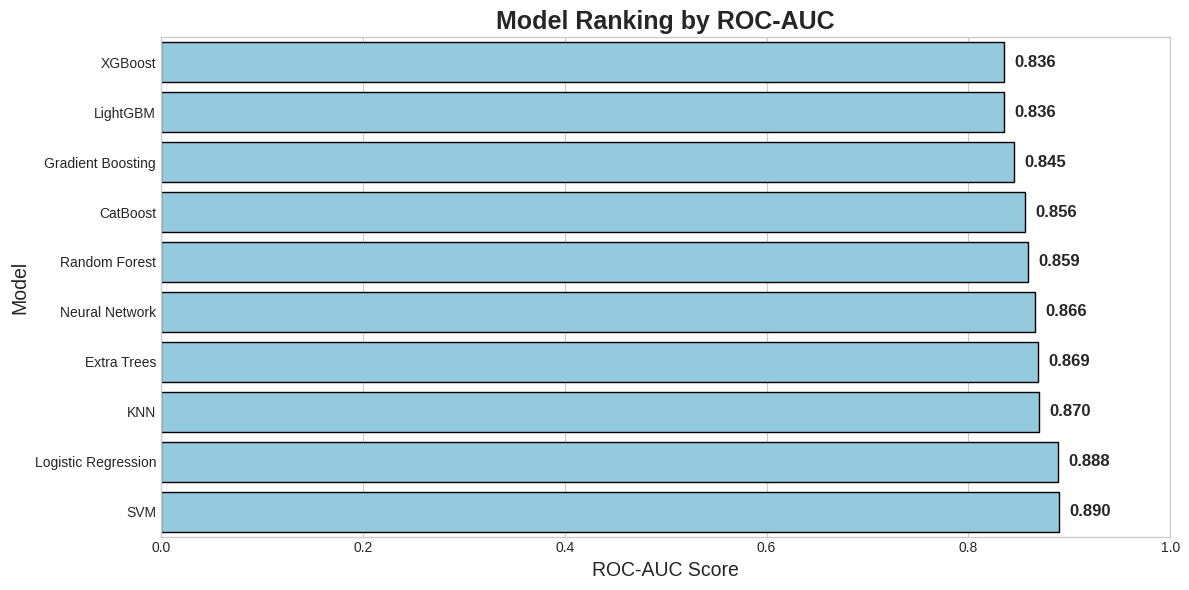

In [55]:
# ===========================================================
# MODEL PERFORMANCE VISUALIZATION – ROC-AUC RANKING
# ===========================================================

plt.figure(figsize=(12, 6))

# Sort for cleaner visualization
plot_df = results_df.sort_values("ROC-AUC", ascending=True)

sns.barplot(
    data=plot_df,
    x='ROC-AUC',
    y='Model',
    color='skyblue',
    edgecolor='black'
)

plt.title("Model Ranking by ROC-AUC", fontsize=18, fontweight="bold")
plt.xlabel("ROC-AUC Score", fontsize=14)
plt.ylabel("Model", fontsize=14)

# Annotations
for index, value in enumerate(plot_df['ROC-AUC']):
    plt.text(
        value + 0.01,
        index,
        f"{value:.3f}",
        va='center',
        fontsize=12,
        fontweight='bold'
    )

plt.xlim(0, 1)
plt.tight_layout()
plt.show()


In [56]:
# ================================================================
# 3. TRAIN MACHINE LEARNING MODELS + IMPROVED NEURAL NETWORK
# ================================================================
print("\nTraining ML models with pipeline + Neural Network...")

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

trained_models = {}
results = []

# -----------------------------
# 1️⃣ Train ML models
# -----------------------------
for name, model in models.items():

    pipe = ImbPipeline([
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=42)),
        ("classifier", model)
    ])

    pipe.fit(X_train, y_train)  # SMOTE + preprocessor + model
    trained_models[name] = pipe

    y_pred  = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'Precision': round(precision_score(y_test, y_pred), 4),
        'Recall': round(recall_score(y_test, y_pred), 4),
        'F1': round(f1_score(y_test, y_pred), 4),
        'ROC-AUC': round(roc_auc_score(y_test, y_proba), 4)
    })

# -----------------------------
# 2️⃣ Train Improved Neural Network
# -----------------------------
print("Training Improved Neural Network...")

# Preprocess train/test first
preprocessed_train = preprocessor.fit_transform(X_train)
preprocessed_test  = preprocessor.transform(X_test)

# SMOTE for NN training
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(preprocessed_train, y_train)

# Define NN architecture with BatchNorm + Dropout
nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),
    Dense(16, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile NN with lower learning rate
nn.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(patience=20, restore_best_weights=True)
reduce_lr  = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, verbose=1)

# Fit NN
nn.fit(
    X_train_bal, y_train_bal,
    epochs=200, batch_size=16,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr],
    verbose=0
)

# Predict NN
y_nn_proba = nn.predict(preprocessed_test, verbose=0).flatten()
y_nn_pred  = (y_nn_proba > 0.5).astype(int)

# Save NN results
results.append({
    'Model': 'Neural Network',
    'Accuracy': round(accuracy_score(y_test, y_nn_pred), 4),
    'Precision': round(precision_score(y_test, y_nn_pred), 4),
    'Recall': round(recall_score(y_test, y_nn_pred), 4),
    'F1': round(f1_score(y_test, y_nn_pred), 4),
    'ROC-AUC': round(roc_auc_score(y_test, y_nn_proba), 4)
})

trained_models['Neural Network'] = nn  # add NN to trained_models



Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb7b2c4ac00>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr


Training ML models with pipeline + Neural Network...


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7cb6d435f380>
Traceback (most recent call last):
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
                   ^^^^^^^^^^^^^^^^^^
  File "/home/salman/anaconda3/lib/python3.12/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
             ^^^^^^^^^^^^^^^^^^
AttributeError: 'NoneType' object has no attr

Training Improved Neural Network...

Epoch 104: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 114: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.


In [57]:
# ================================================================
# 5. RESULTS TABLE
# ================================================================
results_df = pd.DataFrame(results).sort_values("ROC-AUC", ascending=False).reset_index(drop=True)

print("\n==================== FINAL MODEL RANKING ====================")
print(results_df.to_string(index=False))

best_model_name = results_df.loc[0, "Model"]
print("\nBEST MODEL =", best_model_name)

# return correct reference
best_model = nn if best_model_name == "Neural Network" else trained_models[best_model_name]


==================== FINAL MODEL RANKING ====================
              Model  Accuracy  Precision  Recall     F1  ROC-AUC
                SVM    0.7869     0.8125  0.7879 0.8000   0.8896
Logistic Regression    0.8197     0.8438  0.8182 0.8308   0.8885
                KNN    0.7869     0.8125  0.7879 0.8000   0.8701
        Extra Trees    0.7541     0.7500  0.8182 0.7826   0.8690
     Neural Network    0.7705     0.7436  0.8788 0.8056   0.8636
      Random Forest    0.7377     0.7297  0.8182 0.7714   0.8593
           CatBoost    0.7377     0.7429  0.7879 0.7647   0.8561
  Gradient Boosting    0.7705     0.7714  0.8182 0.7941   0.8452
           LightGBM    0.7377     0.7429  0.7879 0.7647   0.8355
            XGBoost    0.7049     0.7027  0.7879 0.7429   0.8355

BEST MODEL = SVM
